Silakan upload gambar...


Saving translasi.jpeg to translasi.jpeg


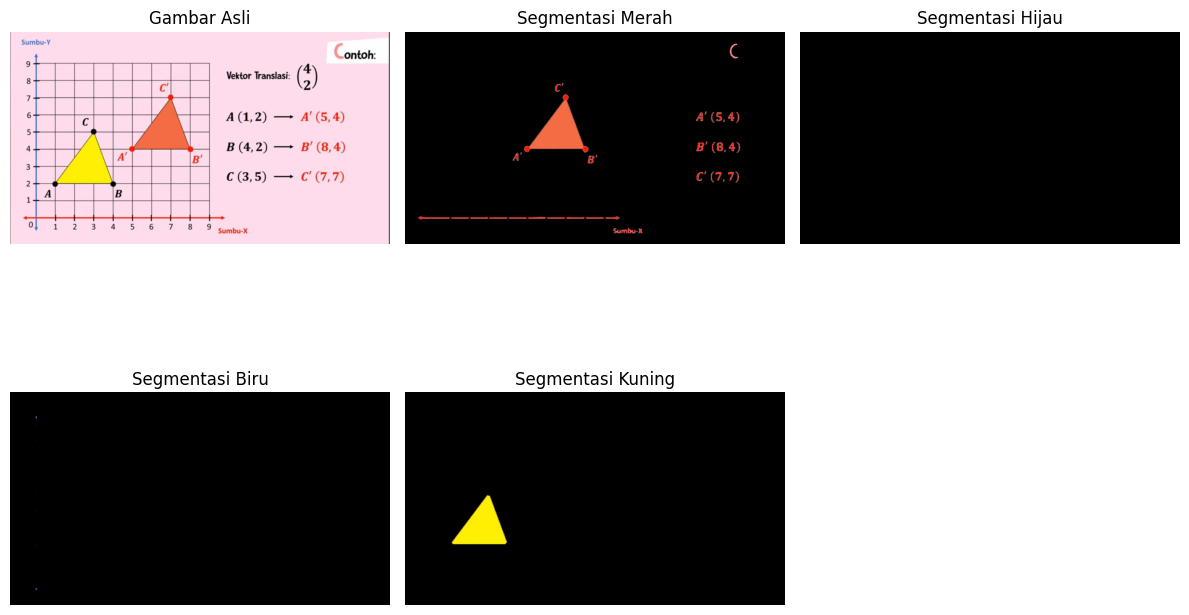

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

def upload_image():
    uploaded = files.upload()
    for name in uploaded.keys():
        img = Image.open(BytesIO(uploaded[name])).convert('RGB')
        return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    return None

def segment_color(img, lower_hsv, upper_hsv):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    result = cv2.bitwise_and(img, img, mask=mask)
    return mask, result

def main():
    print("Silakan upload gambar...")
    img = upload_image()

    if img is None:
        print("Gagal memuat gambar.")
        return

    warna_dict = {
        'Merah':    [(np.array([0, 100, 100]), np.array([10, 255, 255])),
                     (np.array([160, 100, 100]), np.array([179, 255, 255]))],
        'Hijau':    [(np.array([40, 50, 50]), np.array([80, 255, 255]))],
        'Biru':     [(np.array([100, 150, 0]), np.array([140, 255, 255]))],
        'Kuning':   [(np.array([20, 100, 100]), np.array([30, 255, 255]))]
    }

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.title("Gambar Asli")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    index = 2
    for nama_warna, hsv_ranges in warna_dict.items():
        combined_mask = None
        for lower, upper in hsv_ranges:
            mask, _ = segment_color(img, lower, upper)
            combined_mask = mask if combined_mask is None else cv2.bitwise_or(combined_mask, mask)

        hasil = cv2.bitwise_and(img, img, mask=combined_mask)
        plt.subplot(2, 3, index)
        plt.title(f"Segmentasi {nama_warna}")
        plt.imshow(cv2.cvtColor(hasil, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        index += 1

    plt.tight_layout()
    plt.show()

main()